___
# PROJETO 1

## <font color='red'>Frederico Vilela Curti</font>
___

## <font color='blue'>Como vão os aposentados?</font>

## Introdução

Esse projeto visa realizar uma comparação entre a população aposentada brasileira e outros grupos seletos da população, em busca de evidência para entender se há ou não uma melhora na vida (em diversos aspectos) da classe aposentada em relação à não aposentados e à sub-grupos de aposentados.

Uma pesquisa divulgada na globo.com trouxe o título **"Estudo diz que 73% dos aposentados gastam igual ou mais do que na ativa"**, explicando que muitos aposentados continuam trabalhando em função dos altos custos impostos pela velhice e o baixo recurso previdenciário disponibilizado. Apesar de essa pesquisa ter usado um grupo de estudo proporcionalmente pequeno (11 mil indivíduos), expondo poucas variáveis qualitativas (maiores gastos, por exemplo) e quantitativas (73% dos entrevistados), sem a presença de fontes oficiais fica difícil tomar qualquer conclusão à maior prazo e de maior abrangência.
link da matéria: http://g1.globo.com/jornal-nacional/noticia/2014/11/estudo-diz-que-73-dos-aposentados-gastam-igual-ou-mais-do-que-na-ativa.html



___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns',50 )
pd.set_option('display.max_rows', 250)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [3]:
estrutura = pd.read_table("pes_py.txt", sep=";")
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)
pnad2014.columns = estrutura.Coluna
# tamanho do PNAD 2014 = 362627 rows × 341 columns

Para essa análise, de início será feita uma divisão do grupo de estudo entre aposentados pelo INSS (principal interesse da análise, porém também será considerada a aposentadoria privada) e não aposentados, considerando uma idade maior do que 16 anos para ambas as categorias visto que essa é a idade mínima para dar início à contribuição. O gráfico abaixo mostra a proporção que os aposentados (INSS) ocupam na população

Não aposentado    237600
Aposentado         38627
Name: V9122, dtype: int64

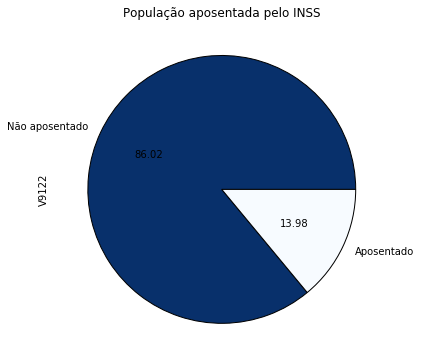

In [4]:
pnad2014.V9122 = pnad2014.V9122.astype("category")
ap = pnad2014.V9122[(pnad2014.V8005>=16)] 
ap.cat.categories = ('Aposentado','Não aposentado')
appie = ap.value_counts()
appie.plot.pie(figsize=(6, 6),title = "População aposentada pelo INSS",colormap="Blues_r",autopct="%0.2f")
appie

Diante desses dados é interessante ver como está a distribuição de renda entre essas duas categorias.
Com os gráficos à seguir ficará fácil visualizar as faixas de rendimento mensal domiciliar per capita
que elas ocupam.

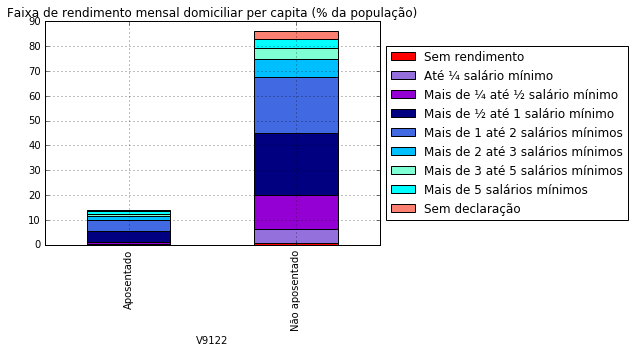

In [5]:
b = pnad2014.V4743.astype('category')
b.cat.categories = ("Sem rendimento","Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","Sem declaração")
ct1 = pd.crosstab(ap,b)
somact1 = ct1.sum().sum()
ct1 = ct1*100/somact1
ct1.plot(kind="bar",stacked=True,grid=True,title="Faixa de rendimento mensal domiciliar per capita (% da população)",color=("r",'mediumpurple','darkviolet','navy','royalblue','deepskyblue','aquamarine','cyan','salmon')).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Abaixo estão as duas colunas da tabela superior separadas e amplidas no formato de pizza, para mais fácil visualização:

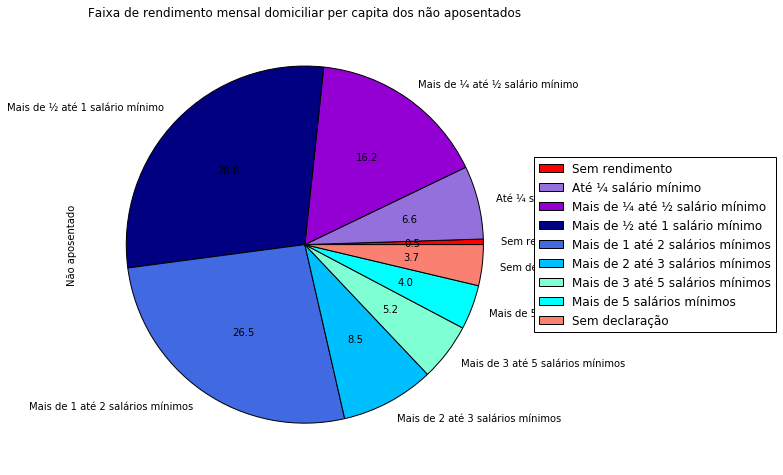

In [6]:
ct1.iloc[1].plot.pie(title = "Faixa de rendimento mensal domiciliar per capita dos não aposentados",autopct="%0.1f",figsize=(8, 8),colors=["r",'mediumpurple','darkviolet','navy','royalblue','deepskyblue','aquamarine','cyan','salmon']).legend(loc='center left', bbox_to_anchor=(1, 0.5))

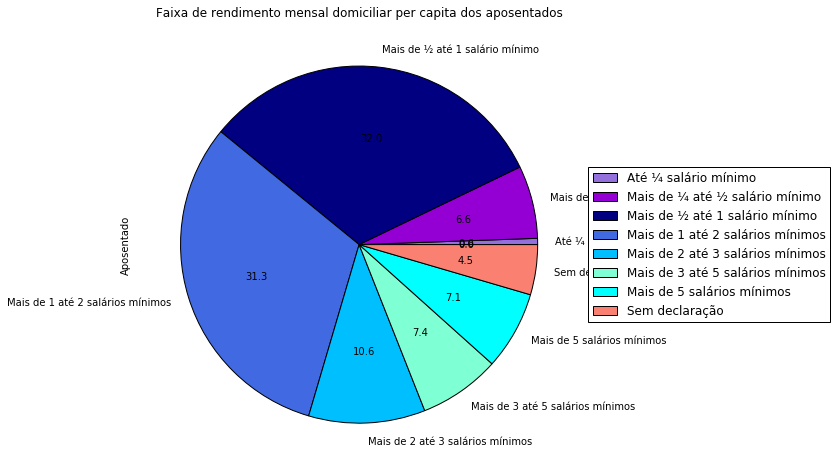

In [7]:
ct1.iloc[0].plot.pie(title = "Faixa de rendimento mensal domiciliar per capita dos aposentados",autopct="%0.1f",figsize=(8, 8),colors=["r",'mediumpurple','darkviolet','navy','royalblue','deepskyblue','aquamarine','cyan','salmon']).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Os gráficos acima revelam a existência de uma disparidade na distribuição da renda entre aposentados e não aposentados, além de ser curiosa a inexistência de aposentados sem rendimento, afinal, eles recebem mensalmente a aposentadoria. Além disso, as porcentagens dos aposentados em faixas de renda superiores são maiores em todas as faixas à partir de até 1/4 de salário mínimo. Mesmo assim, surpreende o fato de mais de 70% da população aposentada receba até no máximo mais de 1 até 2 salários minimos per capita no domicílio, o que pode incentivar a busca por trabalho pós-aposentadoria.

Tal hipótese nos leva ao gráfico seguinte, que compara a população aposentada e não aposentada que estava trabalhando na semana de referência da pesquisa.

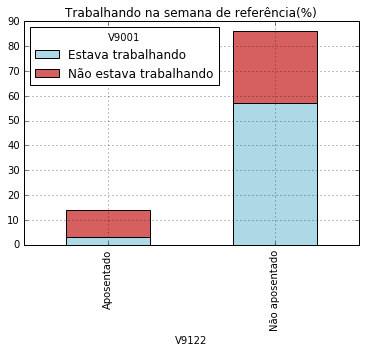

In [8]:
trabsem = pnad2014.V9001.astype('category')
trabsem.cat.categories = ("Estava trabalhando","Não estava trabalhando")
ct2 = pd.crosstab(ap,trabsem)
ct2 = ct2*100/ct2.sum().sum()
ct2.plot(kind='bar',grid=True,stacked=True,color =("lightblue","#d65f5f"),title="Trabalhando na semana de referência(%)",fontsize=10)

Ampliando o gráfico dos aposentados anterior em um gráfico de setores, temos que:

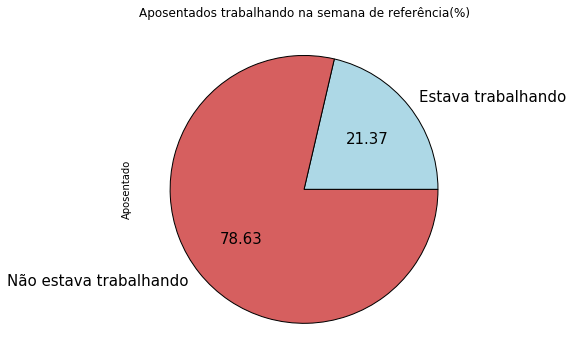

In [9]:
ct2.iloc[0].plot.pie(figsize=(6, 6),colors =("lightblue","#d65f5f"),autopct="%0.2f",fontsize="15",title="Aposentados trabalhando na semana de referência(%)")

Ou seja, **aproximadamente 21% dos aposentados pelo INSS ainda estão trabalhando!** Analisando mais profundamente, podemos encontrar inclusive os setores nos quais esses aposentados estão atuando, que seguem a seguinte distribuição:

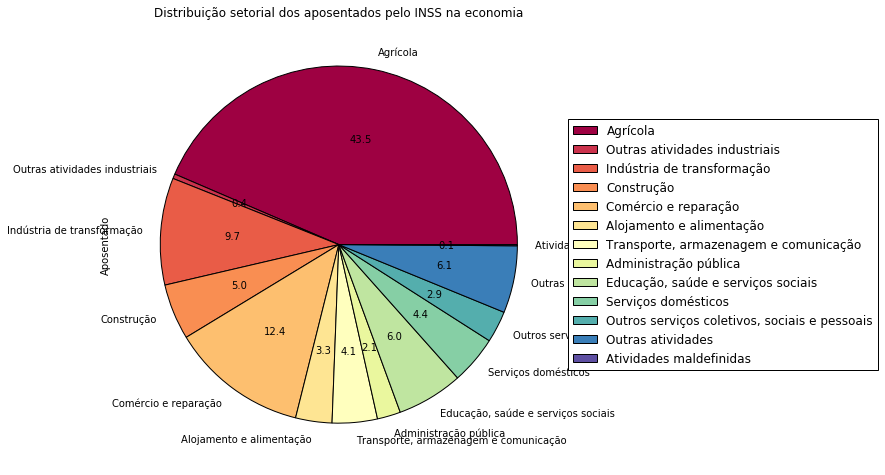

In [10]:
setor = pnad2014.V4809.astype("category")
setor.cat.categories=("Agrícola",'Outras atividades industriais','Indústria de transformação','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades','Atividades maldefinidas')
ct8=pd.crosstab(setor,ap)
ct8.Aposentado.plot.pie(title="Distribuição setorial dos aposentados pelo INSS na economia",autopct="%0.1f",figsize=(8,8),colormap="Spectral").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Surpreendentemente, muitos aposentados estão empregados no setor agrícola, o que nos remete às raizes da economia brasileira de exportação e a ligação do idoso com o campo. Quando comparada ao gráfico à seguir, que mostra os setores nos quais os não aposentados estão empregados, fica evidente uma maior ocupação dos setores ligados ao contexto urbano pela população mais jovem.

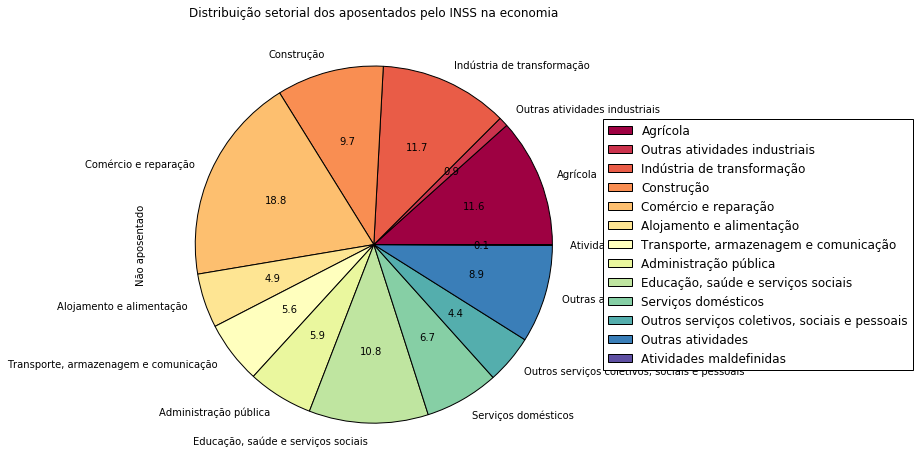

In [11]:
ct8[("Não aposentado")].plot.pie(title="Distribuição setorial dos aposentados pelo INSS na economia",autopct="%0.1f",figsize=(8,8),colormap="Spectral").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Com essas informações, fica claro que a força de trabalho dos aposentados é muito relevante ao contexto atual. Foi observado que **existe uma diferença visível na distribuição de renda entre os aposentados e não aposentados e nos setores econômicos que eles ocupam.** Agora, é dificil mensurar como isso reflete na qualidade de vida, visto que ela é medida por um conjunto enorme de variáveis das quais muitas não estão disponíveis no PNAD. Porém, juntando outros fatores como a renda líquida desses indivíduos e a carga horária de trabalho a qual eles estão sujeitos podem nos ajudar a criar um cenário e avaliá-lo como positivo ou negativo. Os dois gráficos a seguir revelam as medianas e a distribuição da carga horária semanal dos nossos grupos de estudo

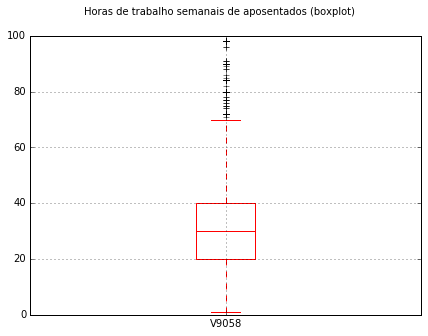

In [12]:
boxa = pnad2014.V9058[(pnad2014.V9122 == 2)][(pnad2014.V8005>=16)].plot.box(figsize=(7,5),title="Horas de trabalho semanais de aposentados (boxplot)",grid=True,color='r',subplots=True)

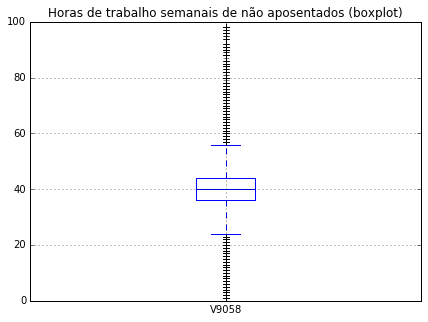

In [13]:
boxb = pnad2014.V9058[(pnad2014.V9122 == 4)][(pnad2014.V8005>=16)].plot.box(figsize=(7,5),grid=True,color='b',title="Horas de trabalho semanais de não aposentados (boxplot)")

Os gráficos acima revelam que **em média, os aposentados trabalham semanalmente 10 horas à menos do que os não aposentados,** e possuem menos divergências quanto à esse critério, visto que existem muitos não aposentados que trabalham até quase 100 horas por semana! Com isso, seria de se esperar que alguma discrepância surgisse nos rendimentos, cujo comportamento pode ser observado nos gráficos a seguir, um histograma de faixas de renda domicilar per capita em valores absolutos para ambos os grupos:

In [14]:
rendas = pd.cut(pnad2014.V4742[(pnad2014.V4742<=10000)],50)
rendas2 = pd.crosstab(rendas,ap,normalize=False)

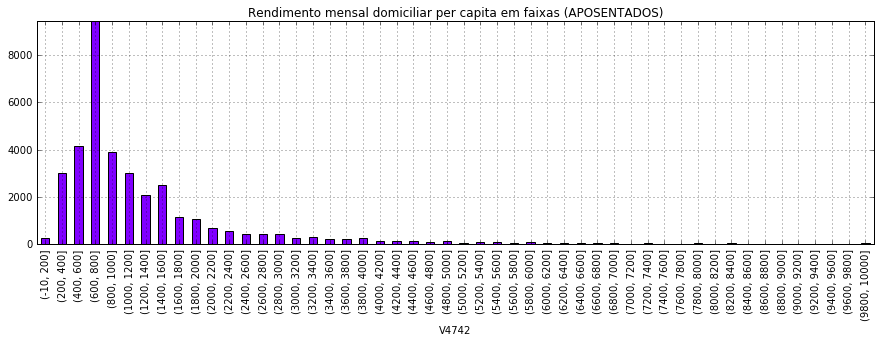

In [15]:
k = rendas2.Aposentado.plot(kind="bar",ylim=[0,max(rendas2.Aposentado)],xlim=[0,1],figsize=(15,4),colormap="rainbow",grid=True,title="Rendimento mensal domiciliar per capita em faixas (APOSENTADOS)")

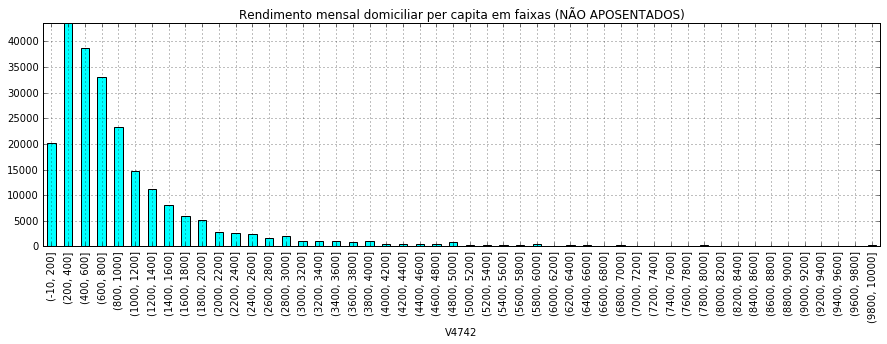

In [16]:
k2 = rendas2['Não aposentado'].plot(kind="bar",ylim=[0,max(rendas2['Não aposentado'])],xlim=[0,1],figsize=(15,4),color="cyan",grid=True,title="Rendimento mensal domiciliar per capita em faixas (NÃO APOSENTADOS)")


Os gráficos acima revelam que embora a distribuição de renda entre o total de aposentados seja
melhor, os não aposentados detêm maior renda para faixas maiores, o que pode nos levar ao seguinte questionamento:** será que existe alguma relação entre a idade dos indivíduos com o rendimento que eles possuem?** esse quociente tende a diminuir conforme a idade progride? ou seria o contrário? Com o seguinte gráfico de dispersão podemos tirar algumas conclusões:

In [107]:
din = 50000
mediarendaap = pnad2014.V4742[(pnad2014.V9122 == 2)][(pnad2014.V4742 < 999999)].describe()
print ("Média dos rendimento mensal domiciliar per capita de aposentados:",mediarendaap[1],"reais")

Média dos rendimento mensal domiciliar per capita de aposentados: 1511.96894073 reais


In [108]:
mediarendanap = pnad2014.V4742[(pnad2014.V9122 == 4)][(pnad2014.V4742 < 999999)][(pnad2014.V8005 >16)].describe()
print ("Média dos rendimento mensal domiciliar per capita de não aposentados:",mediarendanap[1],"reais")

Média dos rendimento mensal domiciliar per capita de não aposentados: 1082.75705668 reais


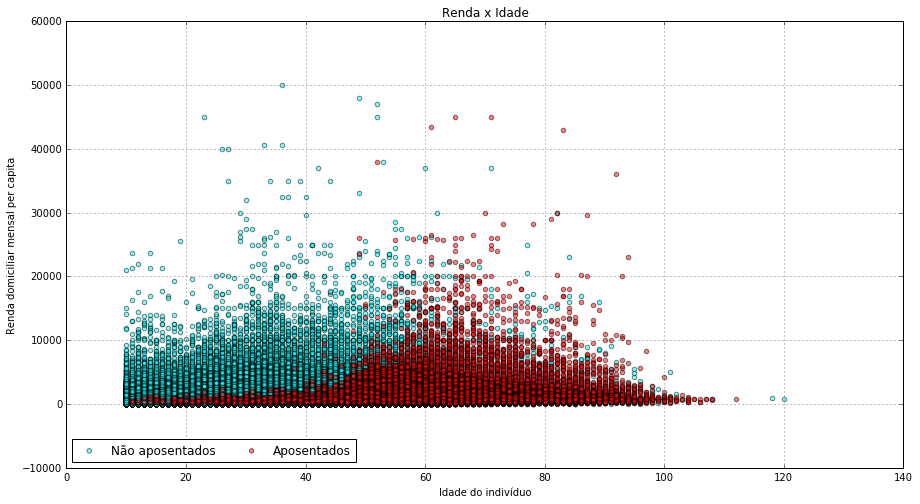

In [22]:

fig = plt.figure(figsize=(15,8))
plt.grid(True)
todos = plt.scatter(x=pnad2014.V8005[(pnad2014.V4742<=din)][(pnad2014.V9122 == 4)],y=pnad2014.V4742[(pnad2014.V4742<=din)][(pnad2014.V9122 == 4)],c="cyan",marker="o",alpha=0.5)
aposents = plt.scatter(x=pnad2014.V8005[(pnad2014.V4742<=din)][(pnad2014.V9122 == 2)],y=pnad2014.V4742[(pnad2014.V4742<=din)][(pnad2014.V9122 == 2)],c="red",alpha=0.5)
plt.legend((todos, aposents),
           ('Não aposentados', 'Aposentados'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=12)
plt.ylabel('Renda domiciliar mensal per capita')
plt.xlabel('Idade do indivíduo')
plt.title("Renda x Idade")
plt.show()

# só consegui usar esse método,o plot do pandas bugava, o que dificultou a análise do scatters como
# a covariância e a linha de tendência

O gráfico acima, por conter muita informação, torna sua interpretação difícil. Entretanto, com o uso de algumas ferramentas, podemos tirar algumas conclusões. Por exemplo, usando a correlação, podemos perceber que a relação entre idade e renda não ocorre de maneira sistemática como o senso comum induz. Isso ressalta o cenário de distribuição de renda brasileiro: para alguns grupos, como ser aposentado ou não, ele revela uma dinâmica previsível, porém, ao generalizarmos para a idade como um todo, esse padrão se mostra de certa forma aleatório.

In [157]:
print("Correlação entre idade x renda para não aposentados:",pnad2014.V8005[(pnad2014.V4742<=din)][(pnad2014.V9122 == 4)].corr(pnad2014.V4742[(pnad2014.V4742<=din)][(pnad2014.V9122 == 4)]))
print("Correlação entre idade x renda para aposentados:",pnad2014.V8005[(pnad2014.V4742<=din)][(pnad2014.V9122 == 2)].corr(pnad2014.V4742[(pnad2014.V4742<=din)][(pnad2014.V9122 == 2)]))

Correlação entre idade x renda para não aposentados: 0.127415290556
Correlação entre idade x renda para aposentados: -0.0181452946541


Por fim, para encerrarmos a comparação entre aposentados e não aposentados(INSS), é interessante a comparação destes em relação à ser ou não contribuinte de entidades de previdência privada, que resulta no gráfico a seguir:

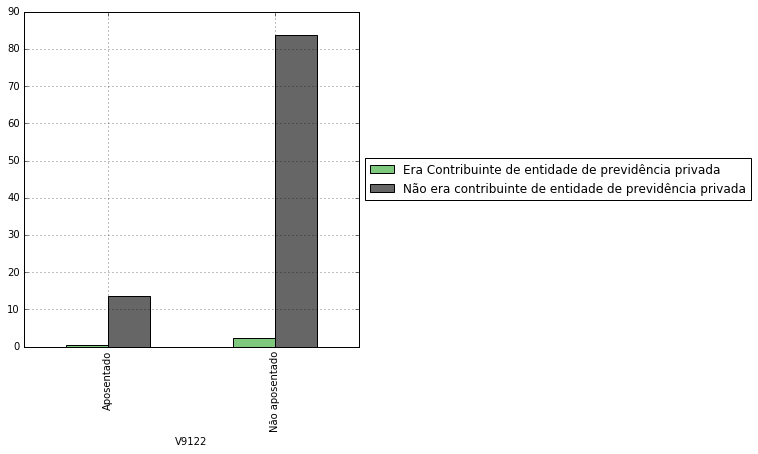

In [167]:
privada = pnad2014.V9120
privada = privada.astype("category")
privada.cat.categories = ("Era Contribuinte de entidade de previdência privada","Não era contribuinte de entidade de previdência privada")
ctprivada = pd.crosstab(privada,ap,normalize=True)
ctprivada2 = ctprivada*100
ctprivada2.T.plot(kind="bar",figsize=(6,6),colormap="Accent").legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

Como isso, fica evidente que **o INSS é de fato a alternativa esmagadoramente mais usada pela população brasileira ** para depositar sua aposentadoria, visto que mesmo na população não aposentada a contribuição para entidades de previdência privada é muito baixa. Mesmo assim, muitas vezes por falta de opção, o INSS é a unica alternativa que grande parte da população possui, e ele, apesar de não se mostrar suficiente para suprir os gastos de toda a população aposentada, garante um rendimento médio maior a mesma.



______
<font size=4> **Agora, vamos comparar grupos de aposentados do INSS entre si**. </font>

Afinal, num país de grande desigualdade, é de se esperar que ela esteja em diversos grupos da sociedade, não só entre aposentados ou não. De início, vale comparar a distribuição da população aposentada e da renda por região, visto que ao longo da extensão brasileira essas diferenças são as mais evidentes nas maiorias das comparações que podem ser realizadas

In [168]:
def regiao(uf):
    if uf < 18:
        return "Norte"
    elif uf < 30:
        return "Nordeste"
    elif uf < 36:
        return "Sudeste"
    elif uf < 44:
        return "Sul"
    else:
        return "Centro-oeste"
    
pnad2014.UF = pnad2014.UF.map(regiao)

TypeError: unorderable types: str() < int()

A figura abaixo mostra a distribuição dos aposentados brasileiros por região.

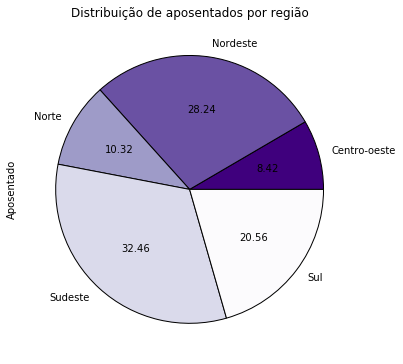

In [170]:
j = pd.crosstab(pnad2014.UF,ap)
j.Aposentado.plot(autopct="%0.2f",kind="pie",colormap='Purples_r',figsize=(6, 6),title="Distribuição de aposentados por região")

Vista essa distribuição, podemos comparar os aposentados de diferentes regiões pelas faixas de renda mensal domiciliar per capita em que eles se encontram, obtendo o gráfico a seguir (a categoria Sem declaração foi retirada): 

In [ ]:
g = pnad2014.V4743
g = g.astype('category')
g.cat.categories = ("Sem rendimento","Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","Sem declaração")

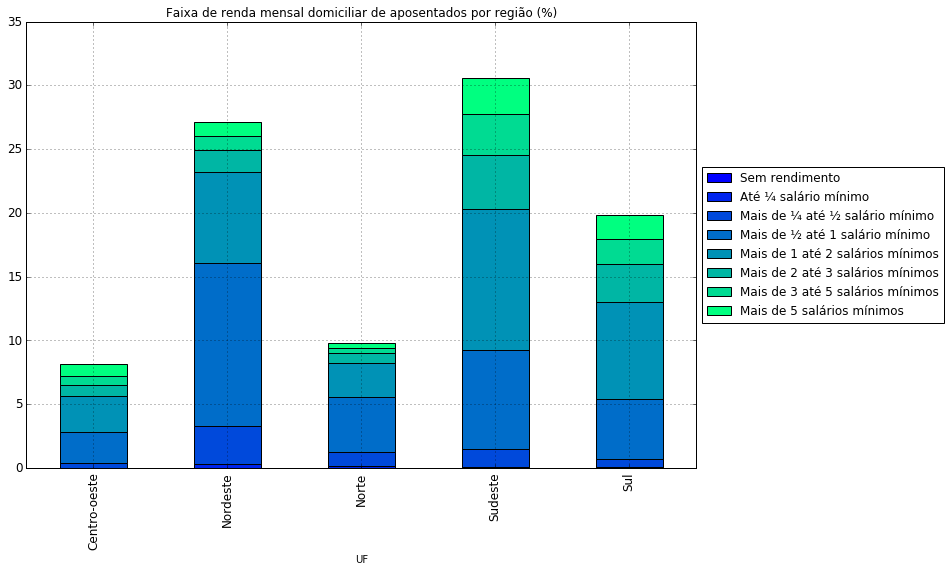

In [199]:
ct6 = pd.crosstab(pnad2014.UF[(pnad2014.V9122 == 2)][(pnad2014.V8005>=16)],g[(pnad2014.V9122 == 2)][(pnad2014.V8005>=16)])
somact6 = ct6.sum().sum()
ct6 = ct6*100/somact6
ct6.iloc[:5,:8].plot(figsize=(12,8),kind="bar",stacked=True,colormap="winter",fontsize=12,grid=True,title="Faixa de renda mensal domiciliar de aposentados por região (%)").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Como o gráfico acima fica evidente que **existe uma desigualdade regional entre os aposentados**, na qual o Sul e o Sudeste apresentam as maiores porções de aposentados com alta renda, enquanto o Norte apresenta as maiores porções com as piores rendas.

**Outra concepção existente** é a desigualdade de gênero, na qual acredita-se que os homens estejam em posição superior às mulheres no quesito financeiro. As tabelas à seguir irão explorar essa concepção em busca de uma conclusão. De início, vale ressaltar que o Brasil possui uma distribuição de gênero muito boa, diferente de países que aplicaram políticas restritivas como a China.

Feminino     186879
Masculino    175748
Name: V0302, dtype: int64

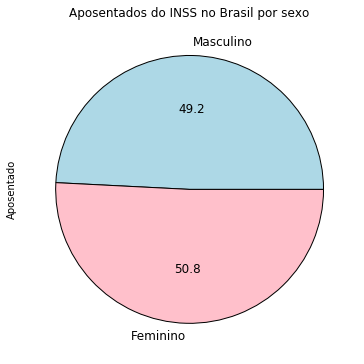

In [211]:
sexo = pnad2014.V0302.astype("category")
sexo.cat.categories = ("Masculino","Feminino")
ct4 = pd.crosstab(sexo,ap)
ct4.Aposentado.plot.pie(colors=("lightblue",'pink'),figsize=(6, 6),autopct="%0.1f",title="Aposentados do INSS no Brasil por sexo",fontsize=12)
sexo.value_counts()

Sabemos que, no geral, a educação é um fator determinante para o sucesso dos indivíduos. Logo, vamos comparar o grau de educação entre homens e mulheres aposentados:

In [207]:
grau = pnad2014.V6007.astype('category')

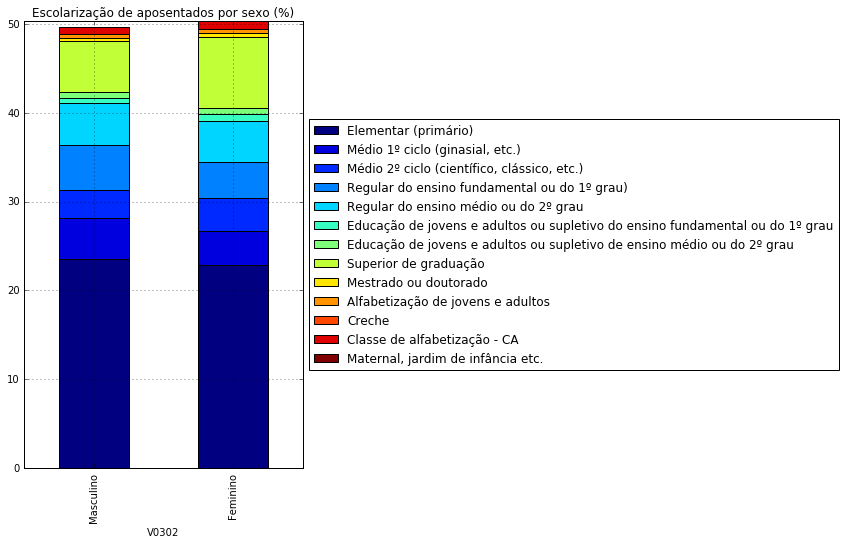

In [217]:
grau.cat.categories = ("Elementar (primário)","Médio 1º ciclo (ginasial, etc.)","Médio 2º ciclo (científico, clássico, etc.)","Regular do ensino fundamental ou do 1º grau)","Regular do ensino médio ou do 2º grau","Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau","Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau","Superior de graduação","Mestrado ou doutorado","Alfabetização de jovens e adultos","Creche","Classe de alfabetização - CA ","Maternal, jardim de infância etc.")
estudo = pd.crosstab(grau[(pnad2014.V9122 == 2)],sexo[(pnad2014.V9122 == 2)])
estudo = estudo*100/estudo.sum().sum()
estudo.T.plot(kind="bar",figsize=(5,8),colormap ="jet",stacked=True,ylim=[0,max(estudo.sum())],grid=True,title="Escolarização de aposentados por sexo (%)").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Os gráficos revelam que **as mulheres aposentadas no geral apresentam um grau maior de escolarização**, especialmente de ensino superior. Agora, é de se esperar que isso seja refletido na distribuição de renda nos gêneros. Vejamos nos gráficos abaixo:

In [221]:
ctfem = pd.crosstab(ap[(sexo == "Feminino")],b)

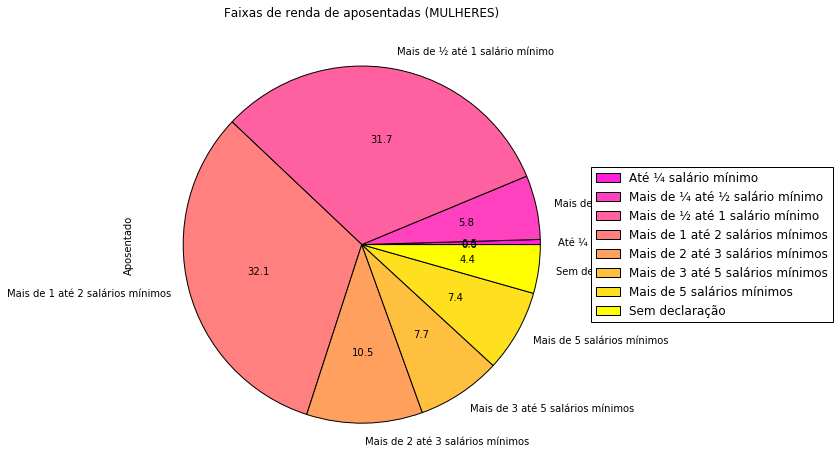

In [222]:
ctfem.iloc[0].plot.pie(colormap="spring",autopct="%0.1f",figsize=(8, 8),title="Faixas de renda de aposentadas (MULHERES)").legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [223]:
ctmale = pd.crosstab(ap[(sexo == "Masculino")],b)

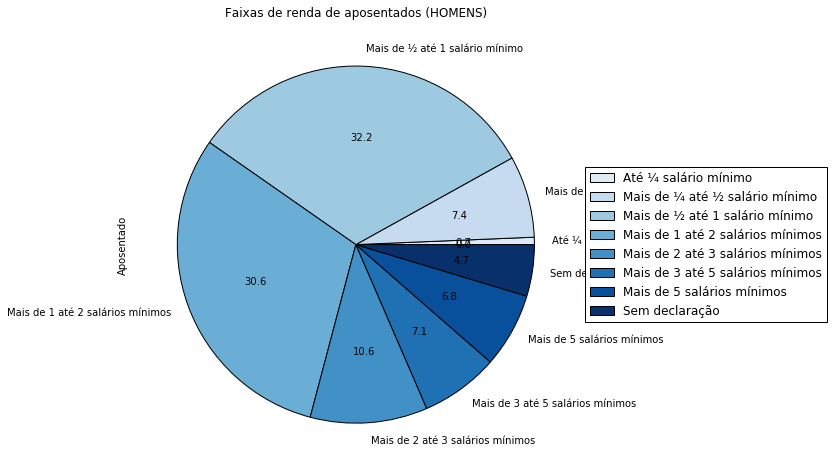

In [224]:
ctmale.iloc[0].plot.pie(colormap="Blues",autopct="%0.1f",figsize=(8, 8),title="Faixas de renda de aposentados (HOMENS)").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Com os gráficos de setores acima, ficou claro que existe muito exagero no tema, visto que as mulheres possuem um desempenho superior, apesar de sutil, ao dos homens no quesito renda

___
## Conclusão 

Dessa análise foi possível extrair algumas constatações sobre o cenário dos aposentados brasileiros:
Por comporem uma parcela de aproximadamente 14% do grupo de estudo, dentro do qual apenas 21% trabalha, temos uma porcentagem de 3% da população economicamente ativa composta por aposentados, o que mostra que a contribuição destes para o PIB como um todo é muito pequena, embora não desprezível. Além disso, esses indivíduos trabalham menos do que os não aposentados.
A distribuição de renda dos aposentados é visívelmente melhor, tornando raras as ocorrências de um aposentado em situação de pobreza. Entretanto, quando usando a idade como parâmetro, não existe um padrão muito evidente entre a idade a renda domiciliar per capita, tornando necessária uma análise futura mais aprofundada. Também fica clara que as fronteiras regionais também afetam a classe dos aposentados, na qual as regiões menos desenvolvidas do país apresentam também os piores índices de renda para estes. Além disso, podemos perceber que apesar de uma grande parcela dos idosos aposentados possuirem baixo grau de escolaridade, muitas vezes associado à vida no campo do contexto agrário/urbano brasileiro, a aposentadoria parece suprir as necessidades de grande parte dos grupos, visto que 79% dos aposentados não estavam trabalhando. Esse suprimento aparentemente reflete no baixo interesse pela previdência privada, para ambos aposentados e não aposentados

Por fim, eu acredito que a vida do aposentado seja sim melhor, apesar do pessimismo que normalmente está associado às condições de abandono da velhice, das previsões demográficas e seus impactos econômicos. Porém, **em lugar algum do Brasil a aposentadoria é sinônimo de conforto**, e isso requer total atenção. O gráfico a seguir mostra uma modesta projeção da expectativa de vida brasileira elaborada em 2013 pelo IBGE, mesmo autor do PNAD que foi tratado nessa análise.

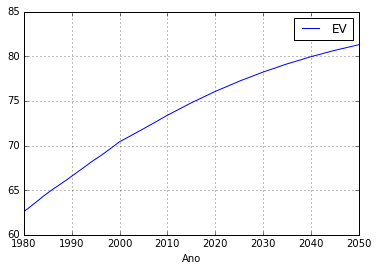

In [112]:
#Projeção expectativa de vida, segundo o IBGE: 
# link : http://seriesestatisticas.ibge.gov.br/series.aspx?no=10&op=0&vcodigo=POP321&t=revisao-2008-projecao-populacao-esperanca-vida
ev = pd.read_excel("series_historicas.xlsx",title="Projeção Expectativa de vida")
ev.plot(x="Ano",y="EV",grid=True)